In [1]:
import pandas as pd
import numpy as np

# Reading the file

In [2]:
df = pd.read_csv("orders_and_shipments.csv")
df.head()

,Order ID,Order Item ID,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,Product Name,...,Shipment Day,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit,Order Date,Shipment Date,Order Value,Shipment Delay
0,3535,8793,2015,2,21,14:07,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,...,27,Standard Class,4,400,0.25,200,21-02-2015,27-02-2015,400,6
1,4133,10320,2015,3,2,07:37,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,...,6,Standard Class,4,400,0.09,200,02-03-2015,06-03-2015,400,4
2,7396,18517,2015,4,18,22:47,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,...,20,Standard Class,4,400,0.06,200,18-04-2015,20-04-2015,400,2
3,11026,27608,2015,6,10,22:32,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,...,12,Standard Class,4,400,0.15,200,10-06-2015,12-06-2015,400,2
4,11026,27609,2015,6,10,22:32,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,...,12,Standard Class,4,400,0.13,200,10-06-2015,12-06-2015,400,2


In [3]:
df.columns

Index(['Order ID ', ' Order Item ID ', ' Order Year ', ' Order Month ',
       ' Order Day ', 'Order Time', 'Order Quantity', 'Product Department',
       'Product Category', 'Product Name', ' Customer ID ', 'Customer Market',
       'Customer Region', 'Customer Country', 'Warehouse Country',
       'Shipment Year', 'Shipment Month', 'Shipment Day', 'Shipment Mode',
       ' Shipment Days - Scheduled ', ' Gross Sales ', ' Discount % ',
       ' Profit ', 'Order Date ', 'Shipment Date ', 'Order Value',
       'Shipment Delay'],
      dtype='object')

# Data Cleaning and Preprocessing:

In [6]:
# checking missing values
df.isnull().sum()

Order ID                       0
 Order Item ID                 0
 Order Year                    0
 Order Month                   0
 Order Day                     0
Order Time                     0
Order Quantity                 0
Product Department             0
Product Category               0
Product Name                   0
 Customer ID                   0
Customer Market                0
Customer Region                0
Customer Country               0
Warehouse Country              0
Shipment Year                  0
Shipment Month                 0
Shipment Day                   0
Shipment Mode                  0
 Shipment Days - Scheduled     0
 Gross Sales                   0
 Discount %                    0
 Profit                        0
Order Date                     0
Shipment Date                  0
Order Value                    0
Shipment Delay                 0
dtype: int64

In [7]:
df.dtypes

Order ID                        int64
 Order Item ID                  int64
 Order Year                     int64
 Order Month                    int64
 Order Day                      int64
Order Time                     object
Order Quantity                  int64
Product Department             object
Product Category               object
Product Name                   object
 Customer ID                    int64
Customer Market                object
Customer Region                object
Customer Country               object
Warehouse Country              object
Shipment Year                   int64
Shipment Month                  int64
Shipment Day                    int64
Shipment Mode                  object
 Shipment Days - Scheduled      int64
 Gross Sales                    int64
 Discount %                    object
 Profit                         int64
Order Date                     object
Shipment Date                  object
Order Value                     int64
Shipment Del

In [10]:
# Remove leading and trailing spaces in column names
df.columns = df.columns.str.strip()

# Convert 'Order Date' and 'Shipment Date' to datetime with specified format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')
df['Shipment Date'] = pd.to_datetime(df['Shipment Date'], format='%d-%m-%Y')


# Exploratory data Analysis (EDA):

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30871 entries, 0 to 30870
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Order ID                   30871 non-null  int64         
 1   Order Item ID              30871 non-null  int64         
 2   Order Year                 30871 non-null  int64         
 3   Order Month                30871 non-null  int64         
 4   Order Day                  30871 non-null  int64         
 5   Order Time                 30871 non-null  object        
 6   Order Quantity             30871 non-null  int64         
 7   Product Department         30871 non-null  object        
 8   Product Category           30871 non-null  object        
 9   Product Name               30871 non-null  object        
 10  Customer ID                30871 non-null  int64         
 11  Customer Market            30871 non-null  object        
 12  Cust

In [13]:
df.describe()

,Order ID,Order Item ID,Order Year,Order Month,Order Day,Order Quantity,Customer ID,Shipment Year,Shipment Month,Shipment Day,Shipment Days - Scheduled,Gross Sales,Profit,Order Value,Shipment Delay
count,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000,30871.000000
mean,35818.833792,89380.257361,2015.948657,6.271679,15.735026,2.149817,6477.672152,2015.955427,6.299569,15.978005,3.072495,200.235690,129.383305,457.044670,3.560753
std,20623.809444,51279.388574,0.796323,3.373914,8.484049,1.461393,3932.830830,0.798863,3.360191,8.582789,1.184417,114.251482,52.649857,467.150652,131.195817
min,11.000000,29.000000,2015.000000,1.000000,1.000000,1.000000,2.000000,2015.000000,1.000000,1.000000,1.000000,10.000000,6.000000,10.000000,-975.000000
25%,17905.000000,44721.500000,2015.000000,3.000000,9.000000,1.000000,3177.000000,2015.000000,3.000000,9.000000,2.000000,120.000000,97.000000,130.000000,2.000000
50%,35886.000000,89624.000000,2016.000000,6.000000,16.000000,1.000000,6355.000000,2016.000000,6.000000,16.000000,4.000000,200.000000,125.000000,300.000000,3.000000
75%,53507.000000,133710.500000,2017.000000,9.000000,23.000000,3.000000,9577.000000,2017.000000,9.000000,23.000000,4.000000,300.000000,150.000000,540.000000,5.000000
max,77095.000000,180410.000000,2017.000000,12.000000,31.000000,5.000000,20648.000000,2017.000000,12.000000,31.000000,4.000000,533.000000,258.000000,2500.000000,978.000000


In [14]:
df.corr()

C:\Users\Mukesh\AppData\Local\Temp\ipykernel_24620\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Order ID,Order Item ID,Order Year,Order Month,Order Day,Order Quantity,Customer ID,Shipment Year,Shipment Month,Shipment Day,Shipment Days - Scheduled,Gross Sales,Profit,Order Value,Shipment Delay
Order ID,1.000000,0.999810,0.750447,0.235100,0.107978,-0.073368,0.145712,0.680986,0.212519,0.075044,-0.016364,0.038450,-0.006032,-0.032822,-0.169693
Order Item ID,0.999810,1.000000,0.750975,0.231900,0.108688,-0.071371,0.138209,0.681288,0.209263,0.075333,-0.016143,0.038285,-0.004471,-0.031411,-0.170252
Order Year,0.750447,0.750975,1.000000,-0.078532,0.084298,-0.050482,0.097718,0.892367,-0.048621,0.065725,0.006385,0.021485,-0.005154,-0.021549,-0.210081
Order Month,0.235100,0.231900,-0.078532,1.000000,-0.006369,-0.055408,0.094724,-0.044002,0.834040,0.007974,-0.003770,0.009526,-0.014444,-0.034562,-0.055261
Order Day,0.107978,0.108688,0.084298,-0.006369,1.000000,0.002361,-0.026403,0.088677,0.003297,0.375238,-0.000687,0.004038,0.007483,0.005724,-0.022238
Order Quantity,-0.073368,-0.071371,-0.050482,-0.055408,0.002361,1.000000,-0.061641,-0.049165,-0.054466,0.001257,0.007612,0.159167,0.092927,0.833063,0.003390
Customer ID,0.145712,0.138209,0.097718,0.094724,-0.026403,-0.061641,1.000000,0.090659,0.095388,-0.014941,-0.006588,0.022099,-0.026441,-0.041145,-0.014044
Shipment Year,0.680986,0.681288,0.892367,-0.044002,0.088677,-0.049165,0.090659,1.000000,-0.089890,0.054861,0.013344,0.021037,-0.002900,-0.019968,0.208061
Shipment Month,0.212519,0.209263,-0.048621,0.834040,0.003297,-0.054466,0.095388,-0.089890,1.000000,-0.013659,-0.007109,0.007479,-0.016932,-0.034491,0.033501
Shipment Day,0.075044,0.075333,0.065725,0.007974,0.375238,0.001257,-0.014941,0.054861,-0.013659,1.000000,0.001020,0.012631,0.011073,0.009991,0.000561


In [ ]:
Data Vis

## 1 Overview of Sales:

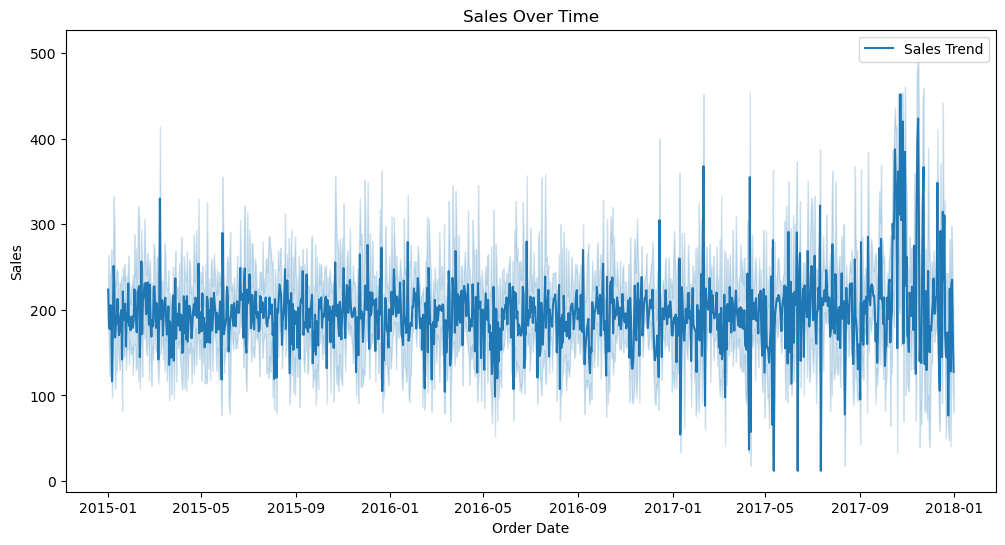

Total Sales: 6181476
Average Sales: 200.23569045382396


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Total and average sales
total_sales = df['Gross Sales'].sum()
average_sales = df['Gross Sales'].mean()

# Visualize sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Date', y='Gross Sales', data=df, label='Sales Trend')
plt.title('Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

print(f"Total Sales: {total_sales}")
print(f"Average Sales: {average_sales}")


## 2 Product Analysis

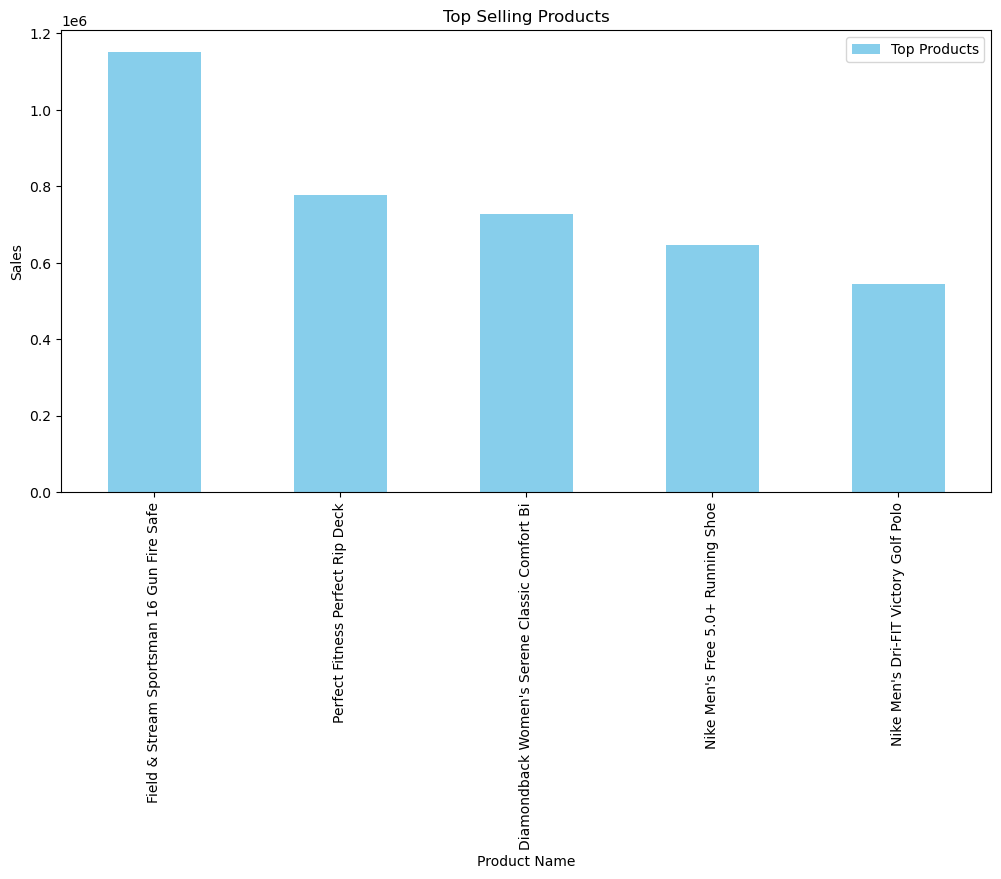

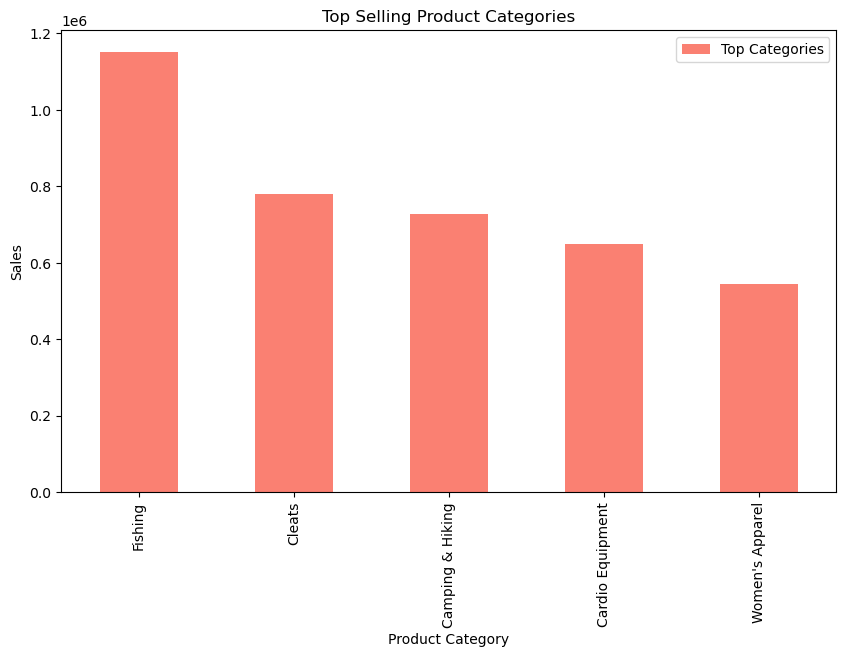

In [17]:
# Top-selling products and categories
top_products = df.groupby('Product Name')['Gross Sales'].sum().nlargest(5)
top_categories = df.groupby('Product Category')['Gross Sales'].sum().nlargest(5)

# Visualize top products and categories
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='skyblue', label='Top Products')
plt.title('Top Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Sales')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='salmon', label='Top Categories')
plt.title('Top Selling Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.legend()
plt.show()


## 3 Profitability analysis 

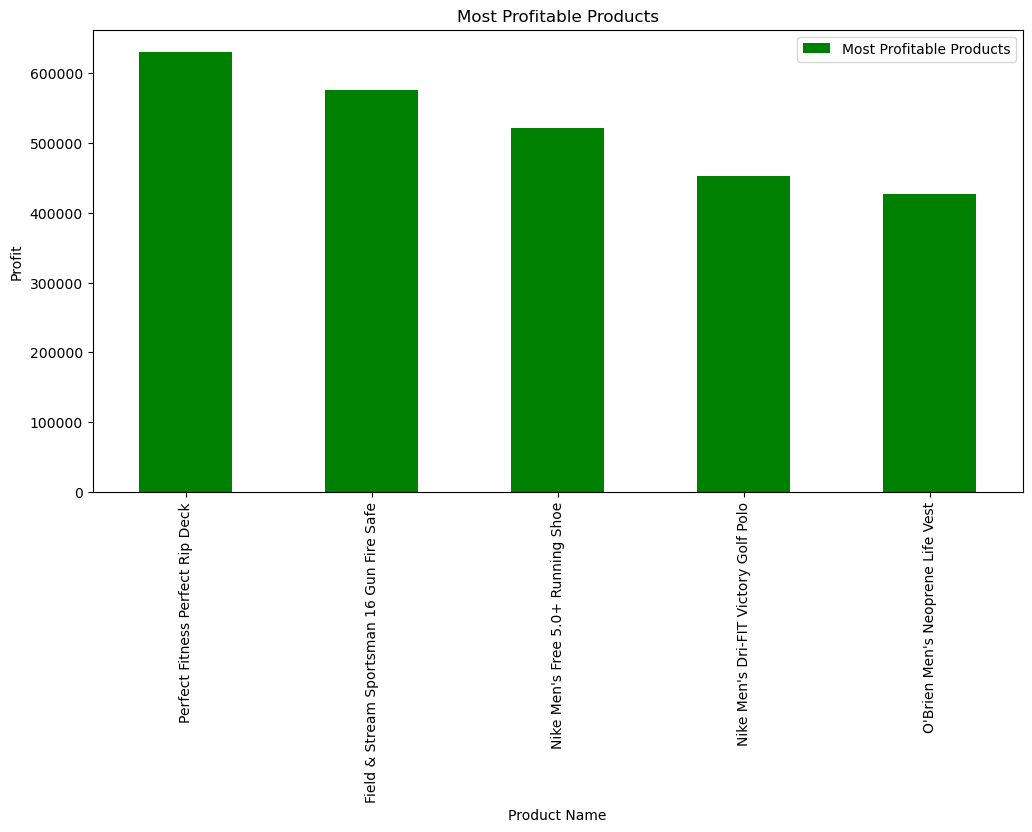

In [18]:
# Analyze profitability of different products
profitable_products = df.groupby('Product Name')['Profit'].sum().nlargest(5)

# Visualize profitable products
plt.figure(figsize=(12, 6))
profitable_products.plot(kind='bar', color='green', label='Most Profitable Products')
plt.title('Most Profitable Products')
plt.xlabel('Product Name')
plt.ylabel('Profit')
plt.legend()
plt.show()


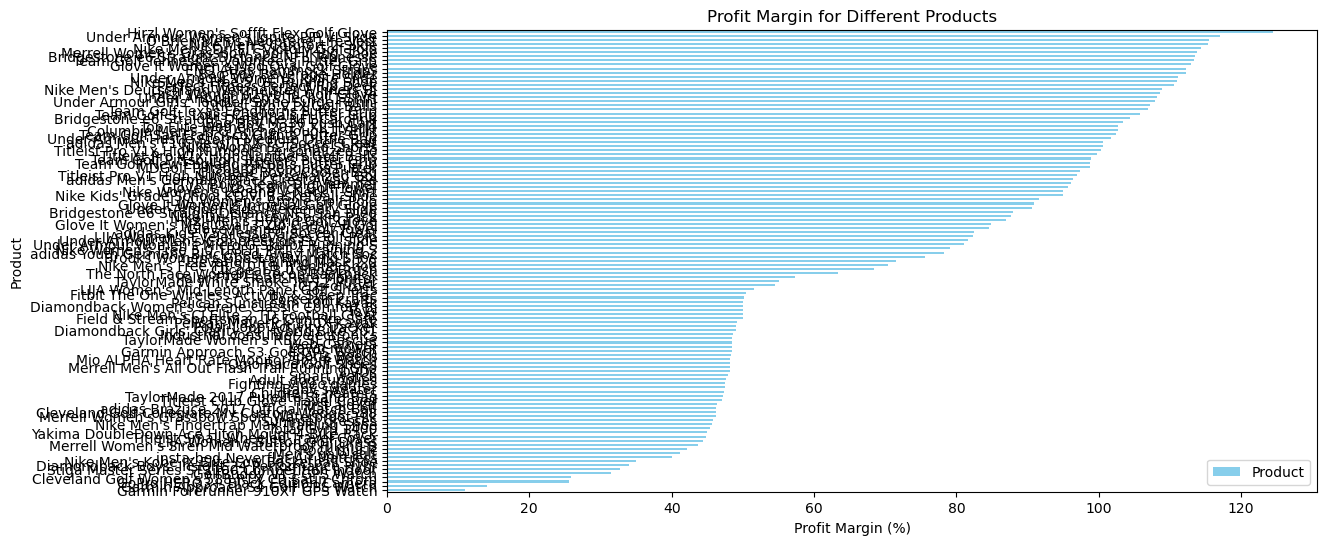

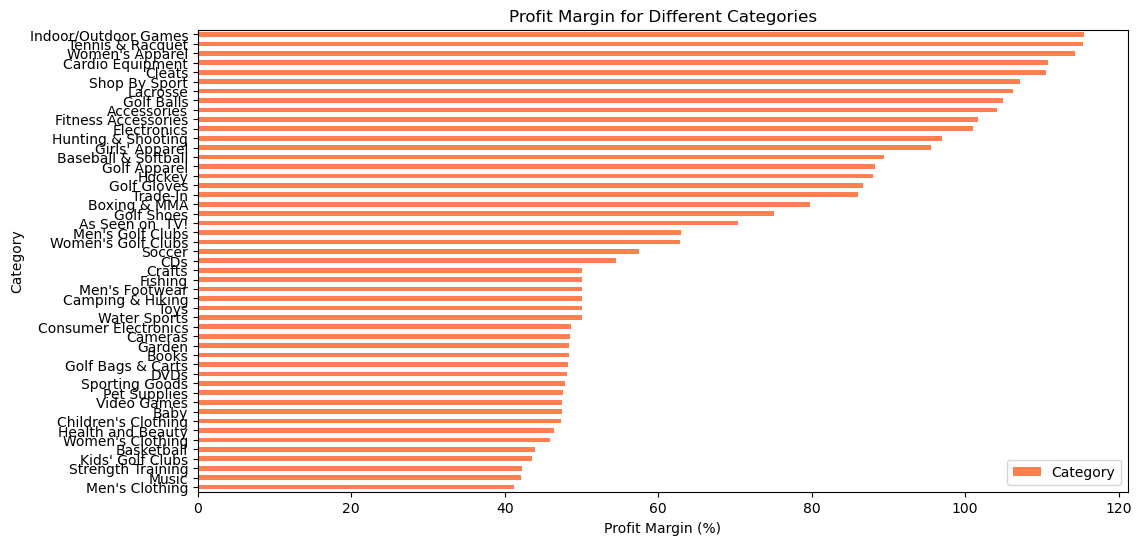

In [32]:
# Calculate profit margin for each product and category
df['Profit Margin'] = (df['Profit'] / df['Gross Sales']) * 100

# Analyze profit margin for different products and categories
product_margin = df.groupby('Product Name')['Profit Margin'].mean()
category_margin = df.groupby('Product Category')['Profit Margin'].mean()

# Plot profit margin for products and categories
plt.figure(figsize=(12, 6))
product_margin.sort_values().plot(kind='barh', color='skyblue', label='Product')
plt.title('Profit Margin for Different Products')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Product')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
category_margin.sort_values().plot(kind='barh', color='coral', label='Category')
plt.title('Profit Margin for Different Categories')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Category')
plt.legend()
plt.show()


C:\Users\Mukesh\AppData\Local\Temp\ipykernel_24620\1067371382.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  discount_impact = df.groupby('Discount %')['Gross Sales', 'Profit'].mean()


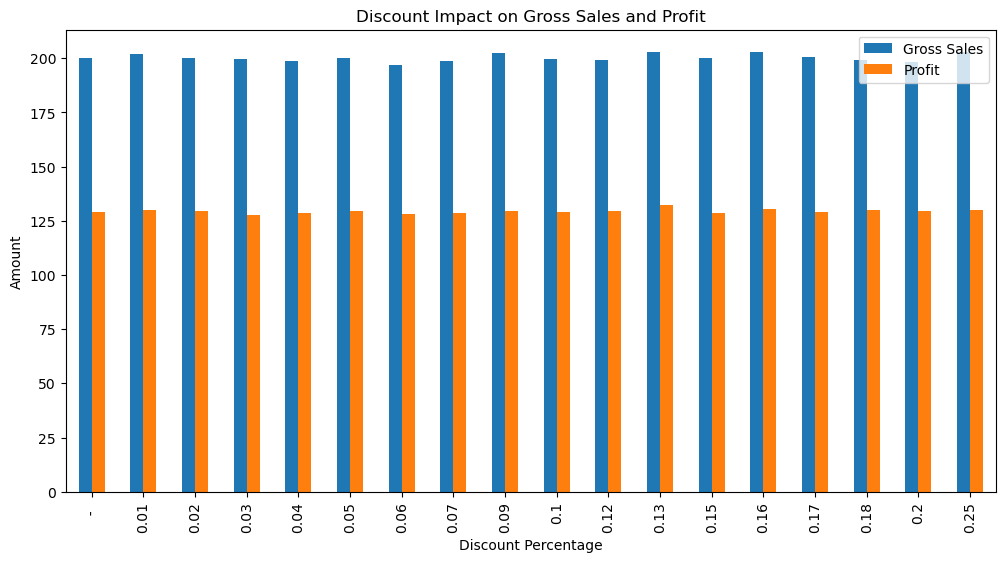

In [34]:
# Analyze the impact of discounts on gross sales and profit
discount_impact = df.groupby('Discount %')['Gross Sales', 'Profit'].mean()

# Plot the impact of discounts
discount_impact.plot(kind='bar', figsize=(12, 6))
plt.title('Discount Impact on Gross Sales and Profit')
plt.xlabel('Discount Percentage')
plt.ylabel('Amount')
plt.show()


## 4 Customer Analysis

#### 4.1 Customer Demographics

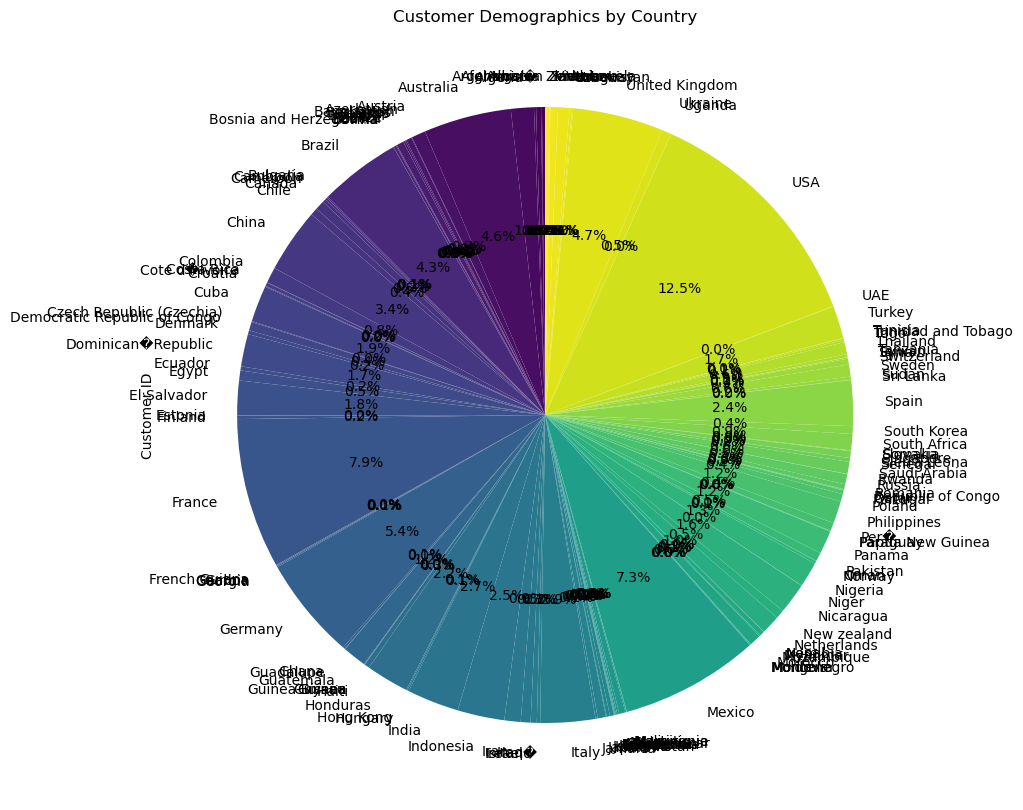

In [19]:
# Understand customer demographics
customer_demographics = df.groupby('Customer Country')['Customer ID'].nunique()

# Visualize customer demographics with a pie chart
plt.figure(figsize=(10, 10))
customer_demographics.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Customer Demographics by Country')
plt.show()


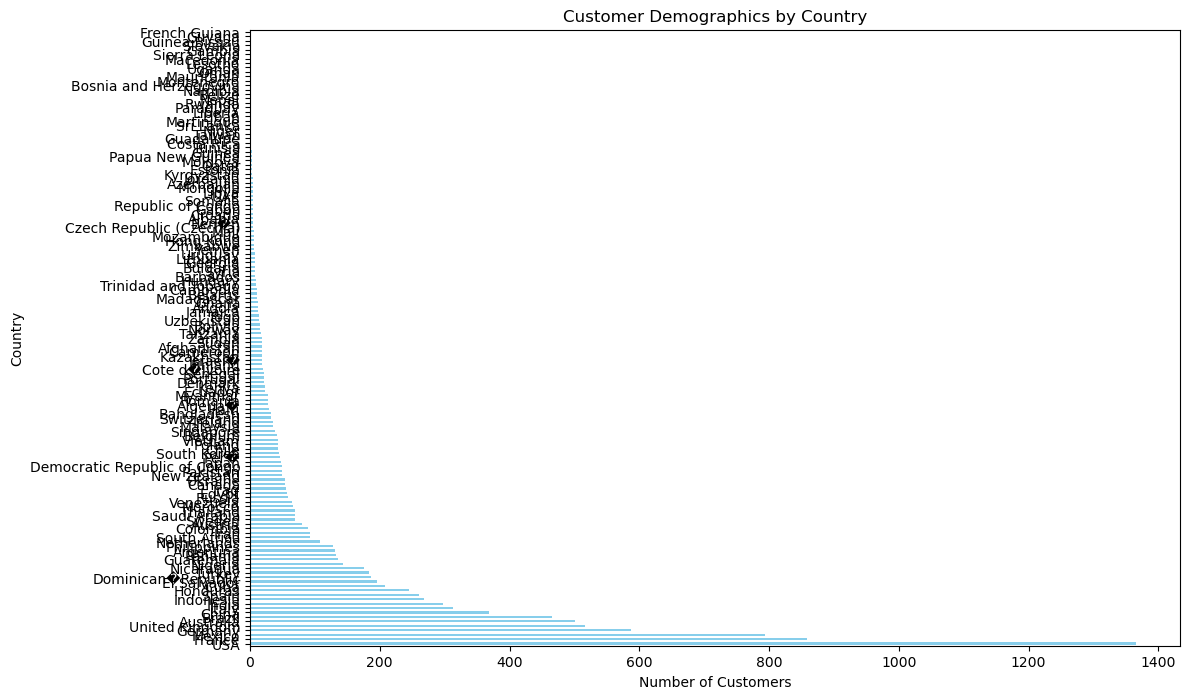

In [28]:
# Sort customer demographics by count in descending order
customer_demographics_sorted = customer_demographics.sort_values(ascending=False)

# Visualize customer demographics with a horizontal bar chart
plt.figure(figsize=(12, 8))
customer_demographics_sorted.plot(kind='barh', color='skyblue')
plt.title('Customer Demographics by Country')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.show()


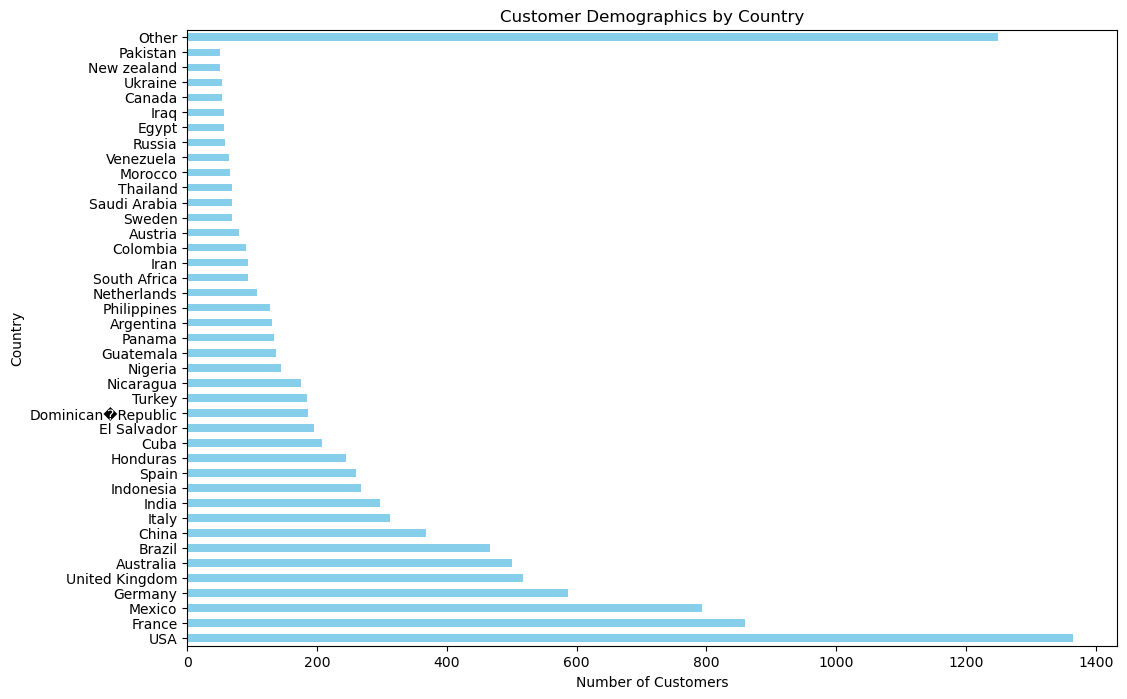

In [29]:
# Group smaller categories into 'Other'
threshold = 50  # Set a threshold for the number of customers
customer_demographics_grouped = customer_demographics_sorted.copy()
customer_demographics_grouped['Other'] = customer_demographics_grouped[customer_demographics_grouped < threshold].sum()
customer_demographics_grouped = customer_demographics_grouped[customer_demographics_grouped >= threshold]

# Visualize grouped customer demographics with a horizontal bar chart
plt.figure(figsize=(12, 8))
customer_demographics_grouped.plot(kind='barh', color='skyblue')
plt.title('Customer Demographics by Country')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.show()


### Correlation Analysis


C:\Users\Mukesh\AppData\Local\Temp\ipykernel_24620\2185080303.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[['Gross Sales', 'Discount %', 'Profit']].corr()


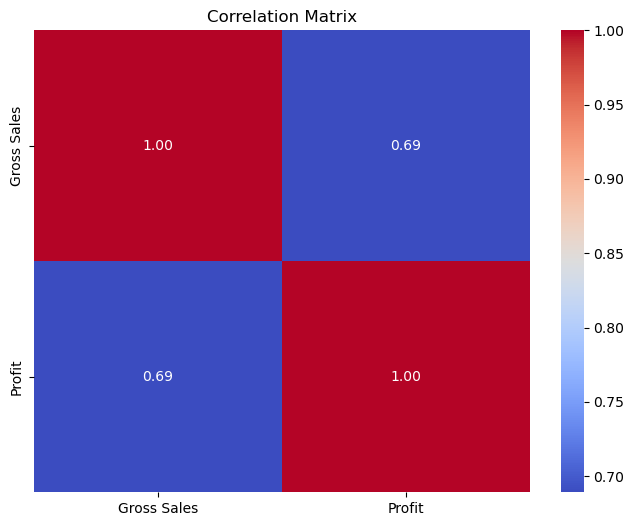

In [36]:
# Explore correlations between variables
correlation_matrix = df[['Gross Sales', 'Discount %', 'Profit']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## Purchasing Patterns and Order Quantities:

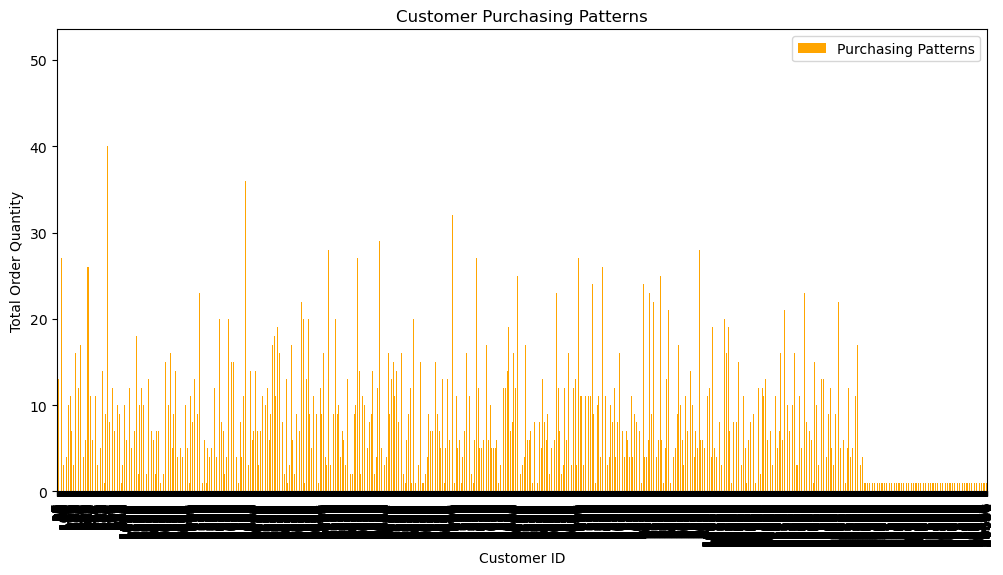

In [20]:


# Analyze purchasing patterns and order quantities
purchase_patterns = df.groupby('Customer ID')['Order Quantity'].sum()

# Visualize purchasing patterns with a bar graph
plt.figure(figsize=(12, 6))
purchase_patterns.plot(kind='bar', color='orange', label='Purchasing Patterns')
plt.title('Customer Purchasing Patterns')
plt.xlabel('Customer ID')
plt.ylabel('Total Order Quantity')
plt.legend()
plt.show()

### 2.4.1 Shipment Modes and Delivery Times:

## Shipment Analysis:

In [44]:

# Combine 'Order Year', 'Order Month', and 'Order Day' into a new 'Order Date' column
df['Order Date'] = pd.to_datetime(df[['Order Year', 'Order Month', 'Order Day']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d', errors='coerce')

# Drop the individual date columns if needed
df = df.drop(['Order Year', 'Order Month', 'Order Day'], axis=1)



In [45]:
# Convert 'Order Date' and 'Shipment Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Shipment Date'] = pd.to_datetime(df['Shipment Date'])

# Calculate order processing time
df['Order Processing Time'] = (df['Shipment Date'] - df['Order Date']).dt.days

# Calculate average order processing time
avg_processing_time = df['Order Processing Time'].mean()

print(f"Average Order Processing Time: {avg_processing_time} days")



Average Order Processing Time: 6.5033526610734995 days


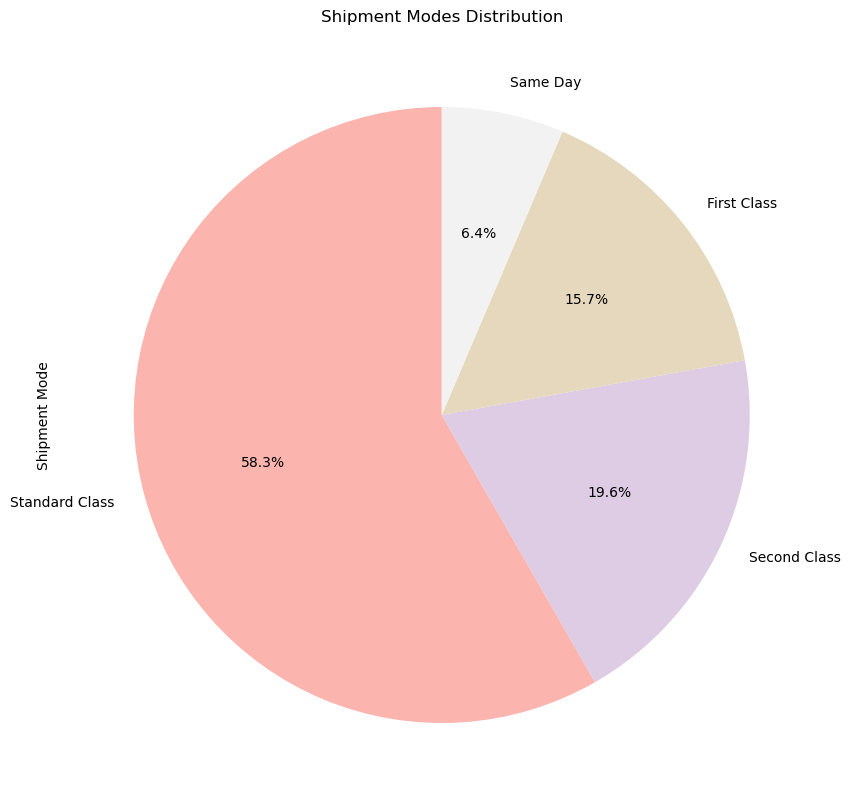

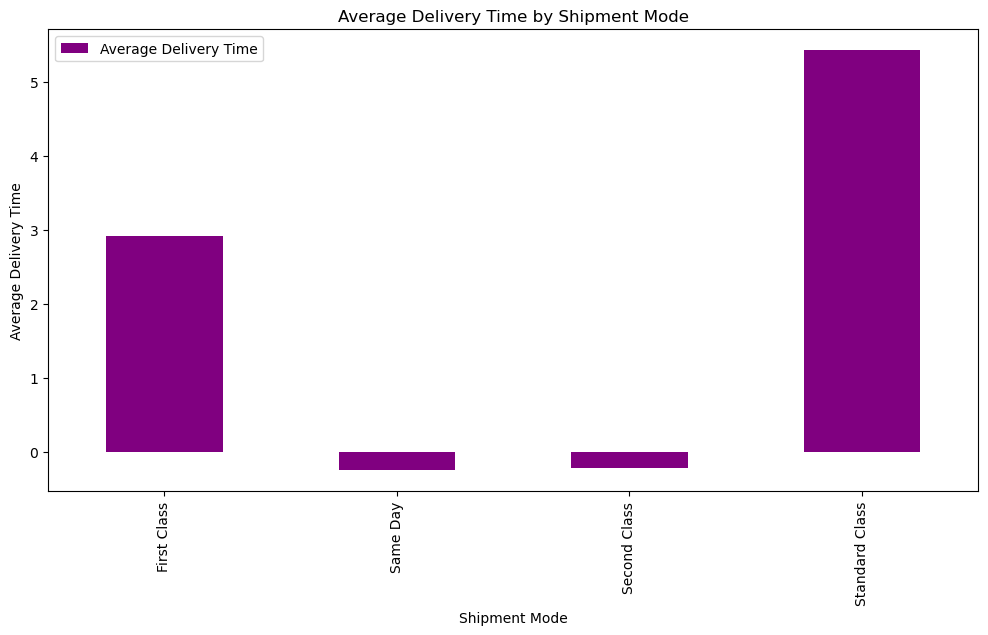

In [21]:



# Analyze shipment modes and their impact on delivery times
shipment_modes = df['Shipment Mode'].value_counts()
average_delivery_time = df.groupby('Shipment Mode')['Shipment Delay'].mean()

# Visualize shipment modes with a pie chart
plt.figure(figsize=(10, 10))
shipment_modes.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Pastel1')
plt.title('Shipment Modes Distribution')
plt.show()

# Visualize average delivery time with a bar graph
plt.figure(figsize=(12, 6))
average_delivery_time.plot(kind='bar', color='purple', label='Average Delivery Time')
plt.title('Average Delivery Time by Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Average Delivery Time')
plt.legend()
plt.show()

### Trend analysis

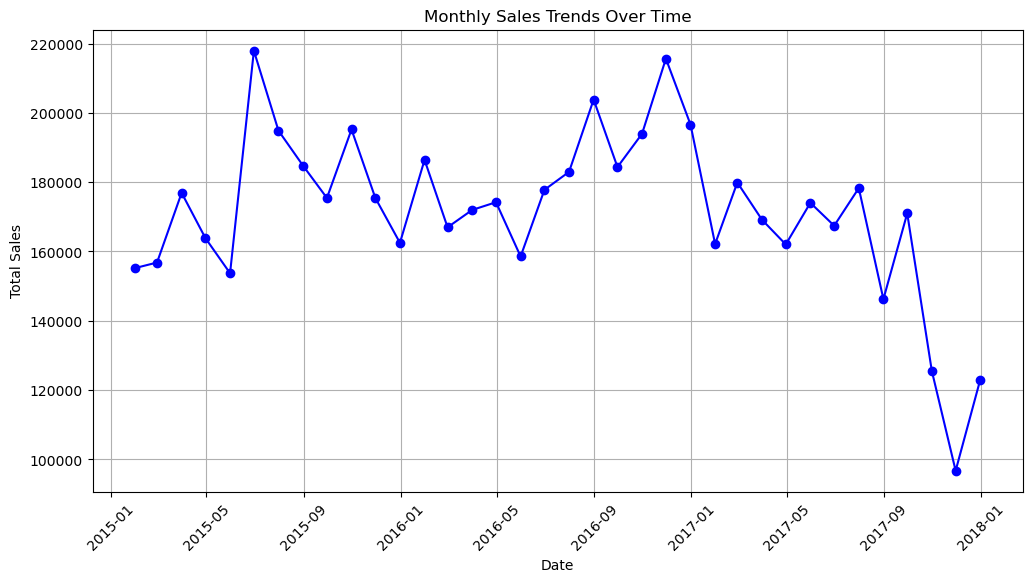

In [24]:
# Assuming 'Order Date' is in datetime format
df.set_index('Order Date', inplace=True)

# Resample data to monthly frequency and calculate total sales
monthly_sales = df['Gross Sales'].resample('M').sum()

# Plotting sales trends over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='blue')
plt.title('Monthly Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Customer segmentation

C:\Users\Mukesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


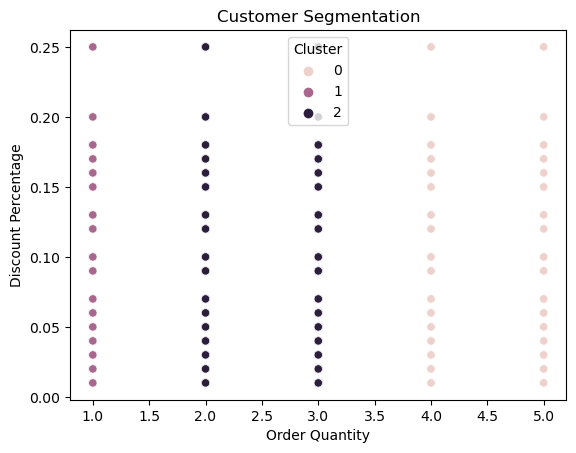

In [48]:
# Utilize clustering algorithms (e.g., KMeans) to segment customers
from sklearn.cluster import KMeans

import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Replace non-numeric values in 'Discount %' column with NaN
df['Discount %'] = pd.to_numeric(df['Discount %'], errors='coerce')

# Drop rows with NaN in 'Discount %' column
df = df.dropna(subset=['Discount %'])

# Select features for clustering
features = df[['Order Quantity', 'Discount %']]

# Create and fit KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

# Visualize customer segmentation
sns.scatterplot(x='Order Quantity', y='Discount %', hue='Cluster', data=df)
plt.title('Customer Segmentation')
plt.xlabel('Order Quantity')
plt.ylabel('Discount Percentage')
plt.show()

